In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data
df = pd.read_csv('ingredient.csv')

In [5]:
# inspect data
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [7]:
# describing the data
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [11]:
# figuring out data types of each column
df.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

df.info()

In [14]:
# checking any missing values
df.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

In [16]:
df.shape

(214, 9)

### IN CONCLUSION:
- Each features are indicates as numerical value as in float value
- No missing value in dataframe


In [51]:
#get the number of numerical variables available
value = [val for val in df.columns if df[val].dtypes != 'O']

print('Total number of value:', len(value))

df[value].head()

Total number of value: 9


,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [86]:
# get the standard and variance for numerical variable

for val in value:
    if val == value[0]:
        variance = round(df.var(),2) 
        column = round(df.std(),2)
        print("Variance")
        print(variance)
        print("\nColumn")
        print(column)

Variance
a    0.00
b    0.67
c    2.08
d    0.25
e    0.60
f    0.43
g    2.03
h    0.25
i    0.01
dtype: float64

Column
a    0.00
b    0.82
c    1.44
d    0.50
e    0.77
f    0.65
g    1.42
h    0.50
i    0.10
dtype: float64


In [85]:
for val in value:
    if val == value[0]:
        variance = round(df.mean(),2) 
        column = round(df.median(),2)
        print("Mean")
        print(variance)
        print("\nMedian")
        print(column)

Mean
a     1.52
b    13.41
c     2.68
d     1.44
e    72.65
f     0.50
g     8.96
h     0.18
i     0.06
dtype: float64

Median
a     1.52
b    13.30
c     3.48
d     1.36
e    72.79
f     0.56
g     8.60
h     0.00
i     0.00
dtype: float64


### In Conclusion: 
- for all columns the value does not have much variance except for column g and c where the values variate to 2.03 and 2.08 respectively

- Whereby mean and median value for all columns are close within the numerical value

In [71]:
# getting list for discrete variables

value_discrete = [val for val in num_vars if len(df[val].unique())<20]

print("Discrete variable count:",len(value_discrete))

Discrete variable count: 0


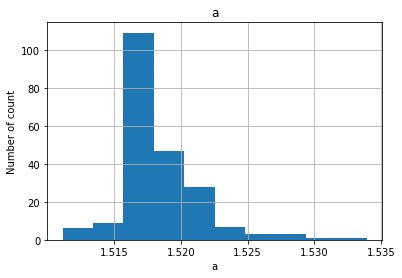

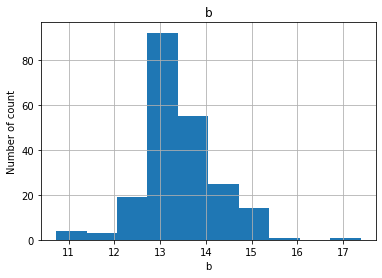

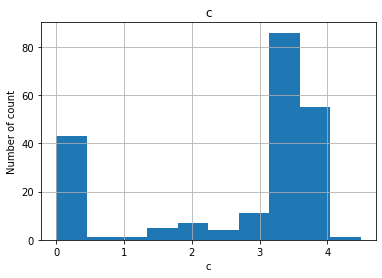

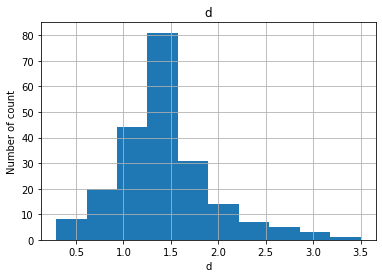

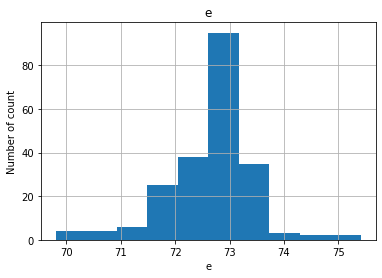

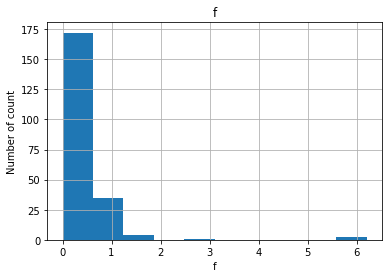

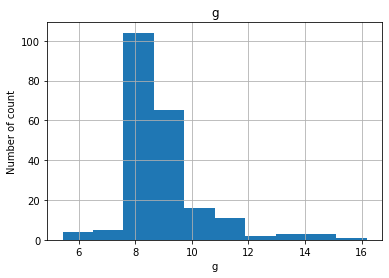

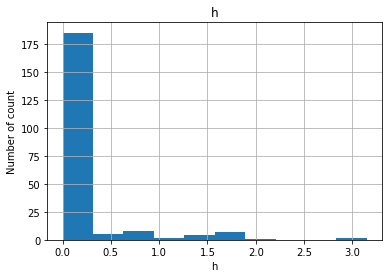

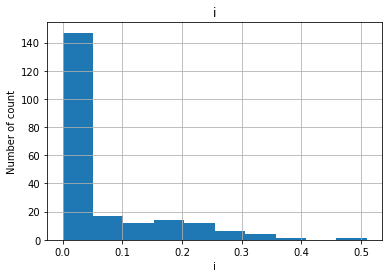

In [89]:
# getting the distributions of continuous variables
for val in num_vars:
    df2 = df.copy()
    df2[val].hist(bins=10)
    plt.xlabel(val)
    plt.ylabel('Number of count')
    plt.title(val)
    plt.show()

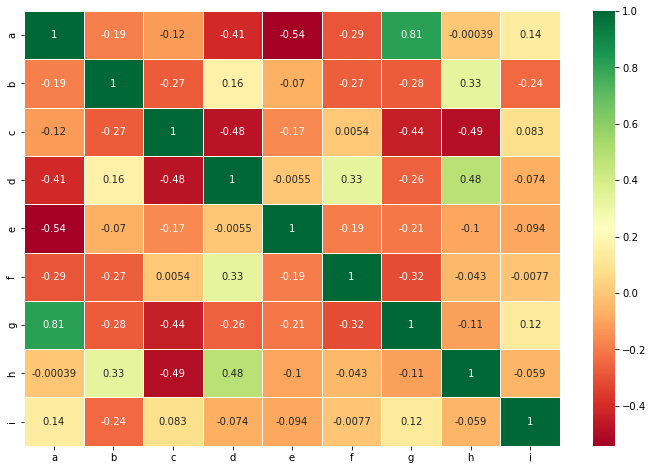

In [92]:
# analyse the heatmap

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### In conclusion: 
- Based on the heatmap display above, we can conclude that features of a & g are highly correlated at 0.81 while features of a & e are the least correlated at -0.54

- Based on the histogram display , also indicates that features h, i and j are not normally distributed while for the rest of the features are normally distributed

## Clustering method with Kmeans clustering

In [95]:
from sklearn.cluster import KMeans

In [97]:
df3 = df.copy()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


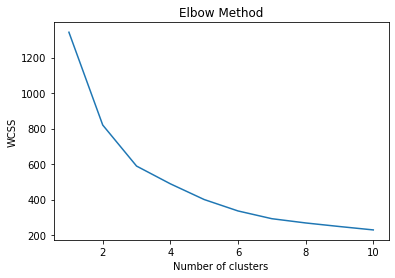

In [106]:
wcss = []
for x in range(1, 11):
    km = KMeans(n_clusters=x, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df3)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### In conclusion

- Elbow method above indicates that 3 clusters are available in this dataset as there are 3 elbowlike plot shown

In [109]:
km = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = km.fit_predict(df3)
pred

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [111]:
print(len(pred))

214


In [124]:
df['predictions1']=pd.DataFrame(pred)

In [126]:
df.predictions1.value_counts()

1    162
0     31
2     21
Name: predictions1, dtype: int64

### In conclusion

- The number of group represented in the dataaset are 3 where represented by 0, 1, 2 cluster with cluster 1 dominate the other clusters